In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [239]:
data = pd.read_csv("renda-preu.csv")
preu21 = data['Preu lloguer'].values.reshape(-1,1)
preu = preu21[:24]
renda21 = data['Renda per capita'].values.reshape(-1,1)
renda = renda21[:24]

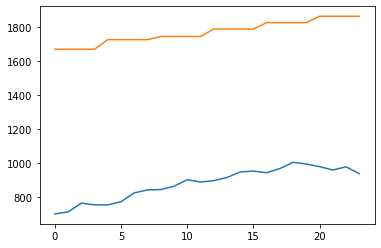

In [247]:
plt.plot(preu)
plt.plot(renda)

0.7432282493084268


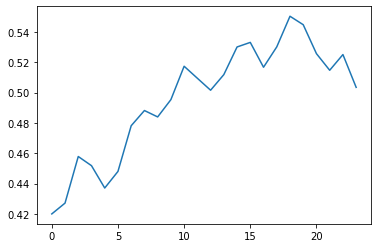

In [254]:
proporcio = preu/renda
X = np.array(range(0, 24)).reshape(-1,1)
regr = LinearRegression()
regr.fit(X, proporcio)
print(regr.score(X, proporcio))
plt.plot(X, proporcio)
proporcio_pred = regr.predict(X)

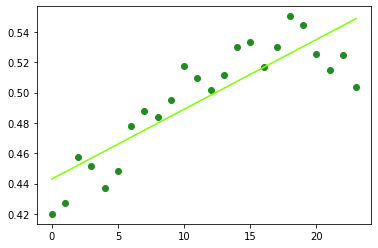

In [255]:
plt.scatter(X, proporcio, color = 'forestgreen')
plt.plot(X, proporcio_pred, color = 'chartreuse')

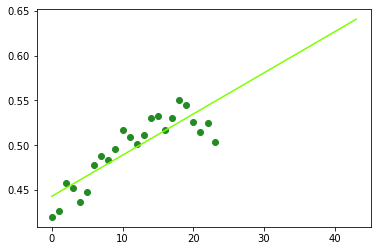

In [260]:
Xfut = np.array(range(0, 44)).reshape(-1,1)
proporcio_predfut = regr.predict(Xfut)
plt.scatter(X, proporcio, color = 'forestgreen')
plt.plot(Xfut, proporcio_predfut, color = 'chartreuse')